#Seaborn
https://seaborn.pydata.org/index.html

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.random import randn, randint

# 한글화

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv    # cache cleaning
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (14.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [2]:
plt.rc('font', family = 'NanumGothic') # adapt font

# Check seaborn module version

In [ ]:
print(sns.__version__)

0.11.2


# Figure-level and axes-level Functions
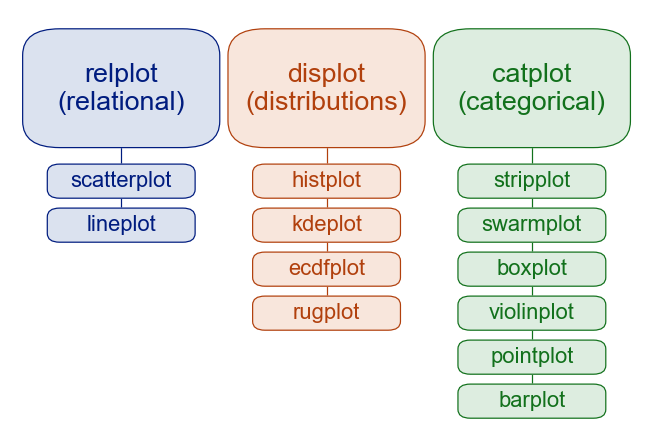

Reference: https://seaborn.pydata.org/tutorial/function_overview.html

# Sample Data

In [3]:
df_tips = sns.load_dataset('tips')
print(df_tips)
print(df_tips.columns)
print(type(df_tips))
print(df_tips.dtypes)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: o

- **sns.relplot(data, x, y)**
  - Default = **Scatter plot**
  - **hue**: Seperate by different **color**
  - **style**: Seperate by different **shape**
  - **size**: Seperate by different **size**


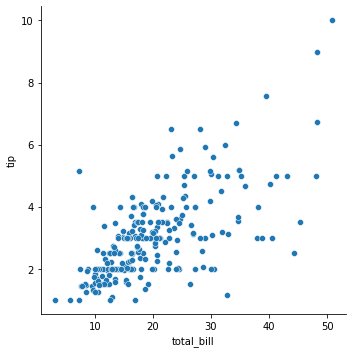

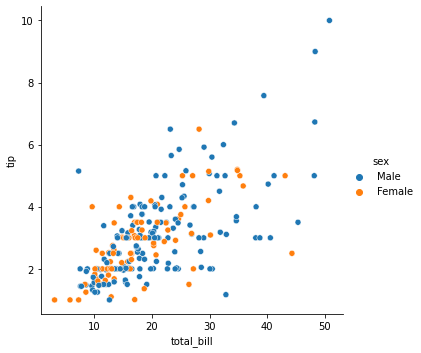

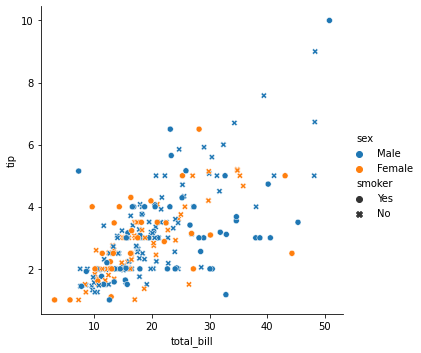

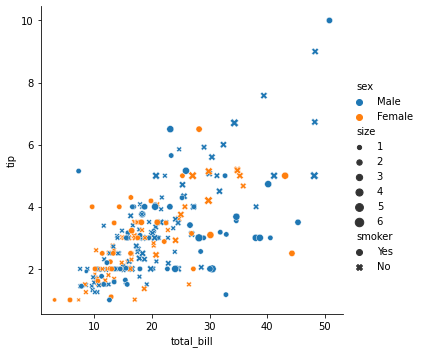

In [ ]:
sns.relplot(data = df_tips, x = 'total_bill', y = 'tip')
sns.relplot(data = df_tips, x = 'total_bill', y = 'tip', hue = 'sex')
sns.relplot(data = df_tips, x = 'total_bill', y = 'tip', hue = 'sex', style = 'smoker')
sns.relplot(data = df_tips, x = 'total_bill', y = 'tip', hue = 'sex', style = 'smoker', size = 'size')

- **col**: Column으로 plot 분리
- **row**: Row으로 plot 분리

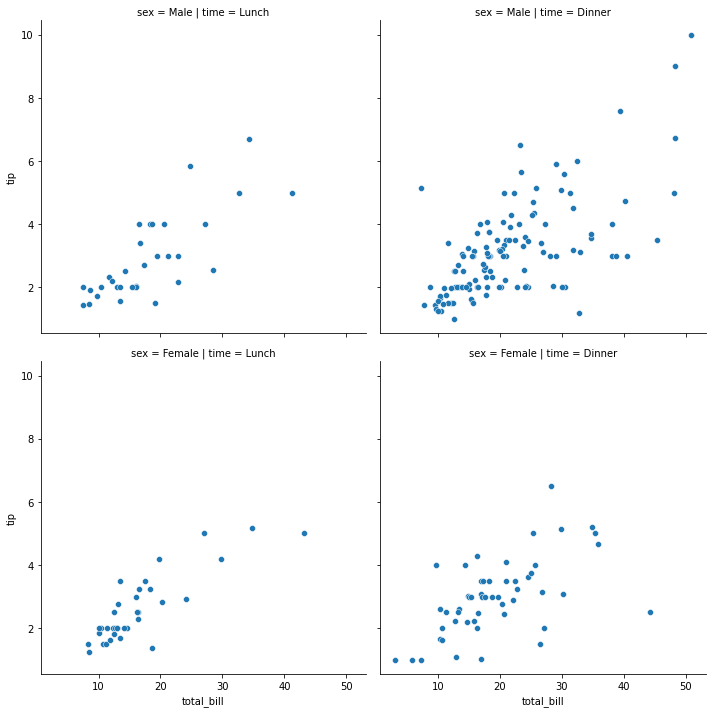

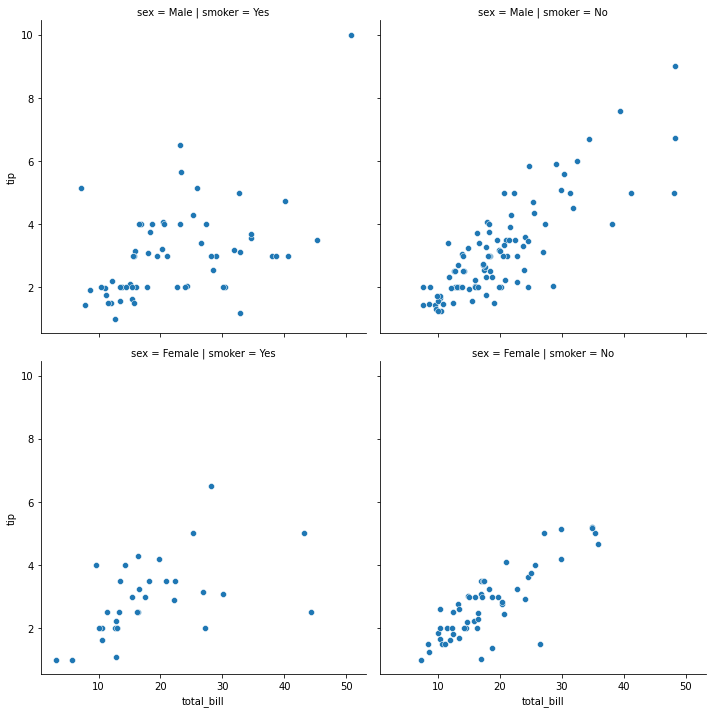

In [ ]:
sns.relplot(data = df_tips, x = 'total_bill', y = 'tip', col = 'time', row = 'sex')
sns.relplot(data = df_tips, x = 'total_bill', y = 'tip', col = 'smoker', row = 'sex')

- **col_wrap**: 특정 개수끼리 정렬

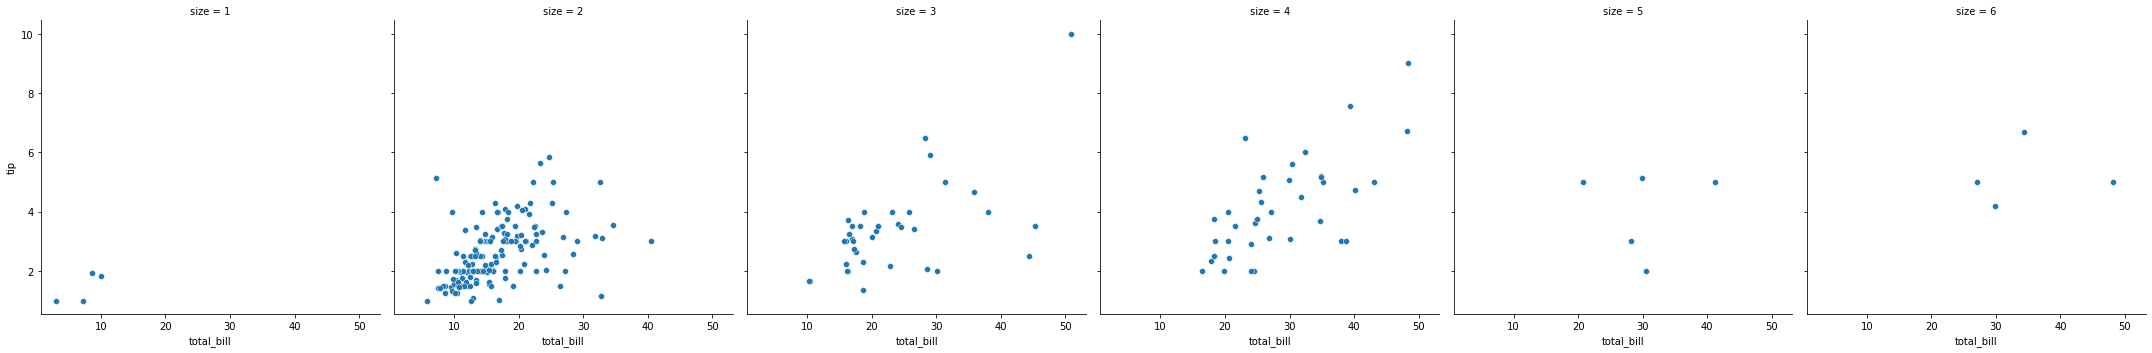

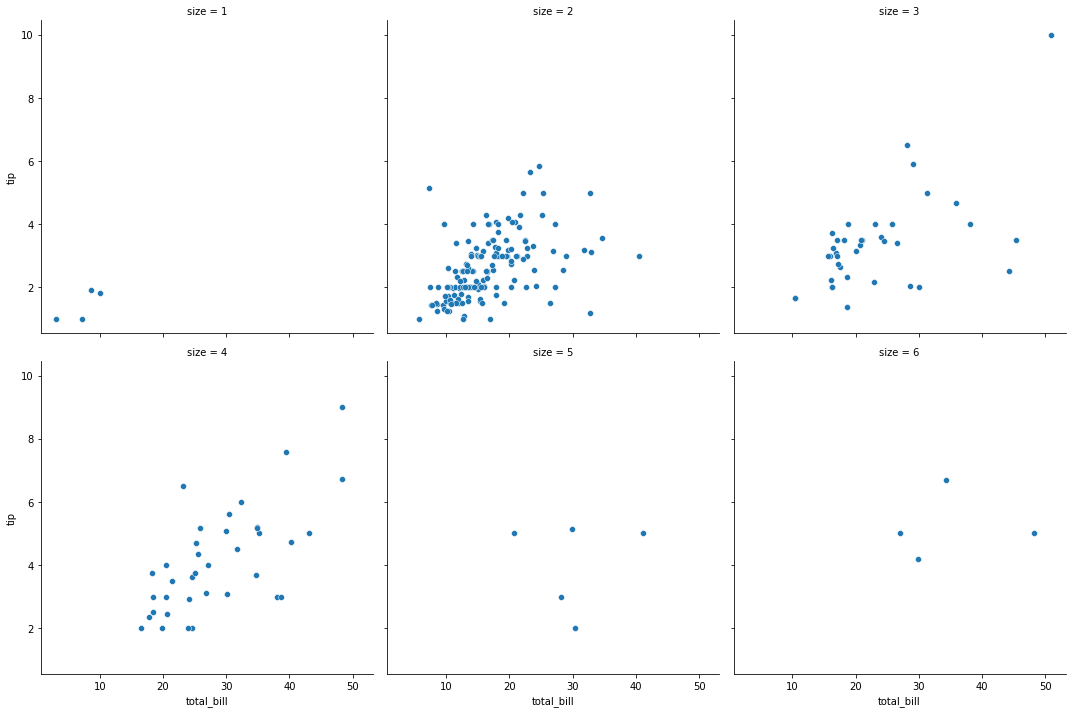

In [ ]:
sns.relplot(data = df_tips, x = 'total_bill', y = 'tip', col = 'size')
sns.relplot(data = df_tips, x = 'total_bill', y = 'tip', col = 'size', col_wrap = 3)

In [ ]:
print(df_tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


# Total_bill과 tip 비율과의 상관관계
- x = total_bill  
- y = tip ratio (= tip / total_bill)

   total_bill   tip     sex smoker  day    time  size  tip_ratio (%)
0       16.99  1.01  Female     No  Sun  Dinner     2       5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3      16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3      16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2      13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4      14.680765


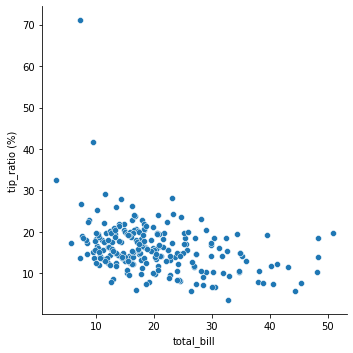

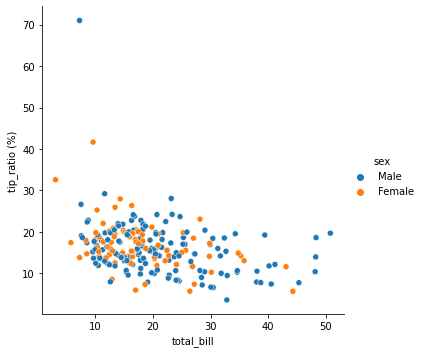

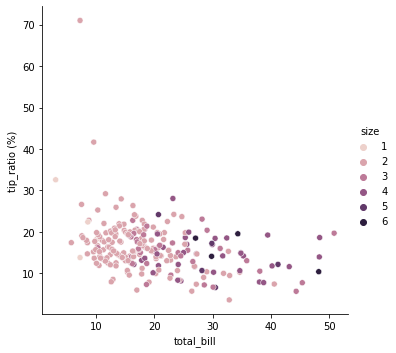

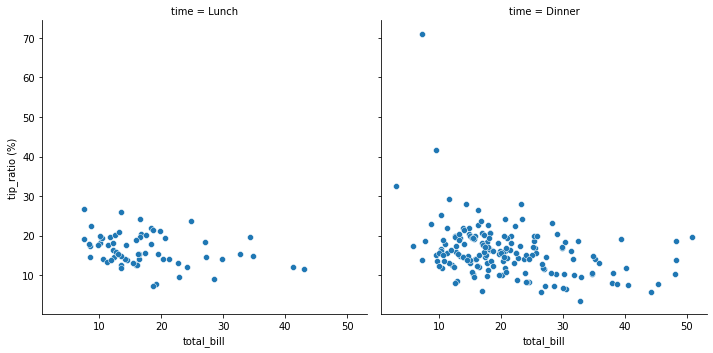

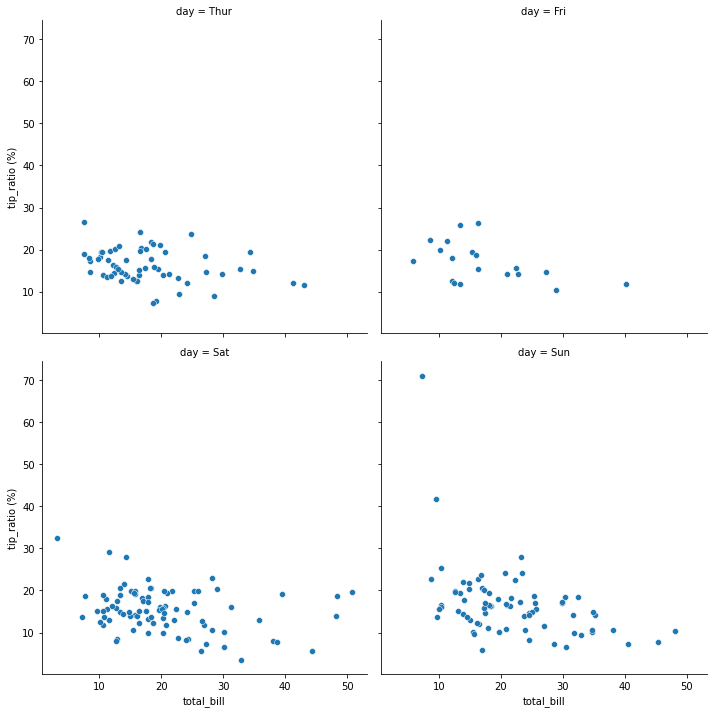

In [ ]:
df_tips['tip_ratio (%)'] = (df_tips['tip']/df_tips['total_bill'])*100
print(df_tips.head(5))

sns.relplot(data = df_tips, x = 'total_bill', y = 'tip_ratio (%)')
sns.relplot(data = df_tips, x = 'total_bill', y = 'tip_ratio (%)', hue = 'sex')
sns.relplot(data = df_tips, x = 'total_bill', y = 'tip_ratio (%)', hue = 'size')
sns.relplot(data = df_tips, x = 'total_bill', y = 'tip_ratio (%)', col = 'time')
sns.relplot(data = df_tips, x = 'total_bill', y = 'tip_ratio (%)', col = 'day', col_wrap = 2)

- **sns.regplot(data, x, y)**
  - 추세선 추가된 scatter plot
  - **ci**: 신뢰구간 (default = 95%)

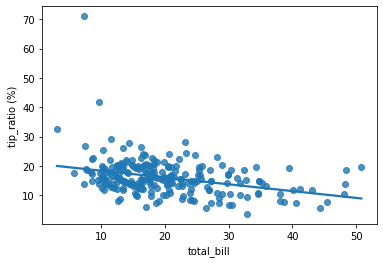

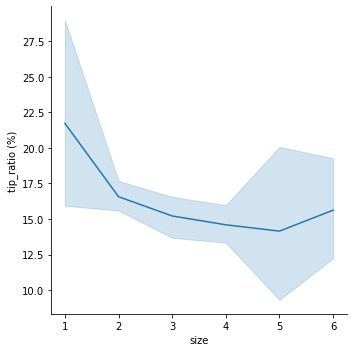

In [ ]:
sns.regplot(data = df_tips, x = 'total_bill', y = 'tip_ratio (%)', ci = None)
sns.relplot(data = df_tips, x = 'size', y = 'tip_ratio (%)', kind = 'line') # Average

# 결과
Total bill이 증가할수록 tip의 비율이 감소하는 경향성을 보인다.

# Create various kinds of plot
- **aspect**: width and height ratio (width / height)

- Seaborn으로 만든 plot을 matplotlib, numpy를 이용하여 세세한 설정들을 조작할 수 있다.

             A
0     0.040729
1    -0.602907
2     0.908278
3     0.106512
4    -0.619171
..         ...
995  28.831431
996  28.698636
997  28.065292
998  28.522952
999  28.261268

[1000 rows x 1 columns]
<class 'seaborn.axisgrid.FacetGrid'>
<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7336d8c710>]]


Text(0.5, 6.79999999999999, 'X-label')

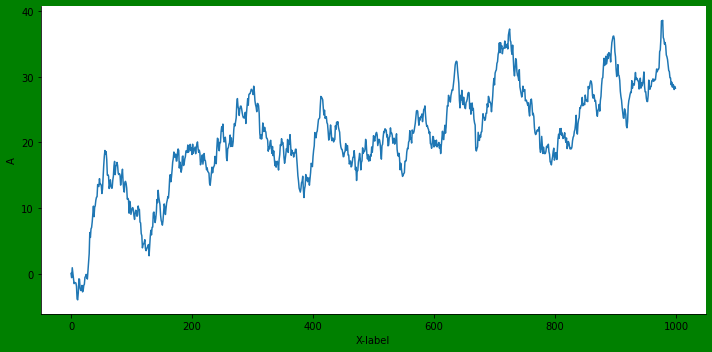

In [ ]:
df1 = pd.DataFrame(randn(1000, 1).cumsum(), columns = ['A'])
print(df1)

#sns.relplot(data = df1, x = df1.index, y = df1['A'], height = 3)
x = sns.relplot(data = df1, x = df1.index, y = df1['A'], kind = 'line', aspect = 2)
print(type(x))
y = x.figure # matplotlib figure
print(type(y))
y.set_facecolor('green')
z = x.axes   # ndarray
print(type(z))
print(z)

a = z.flatten()[0]  # 2darray (위치) (column, row)
a.set_xlabel('X-label')

- matplotlib으로 만든 figure에 seaborn으로 만든 plot를 넣을 수 있음

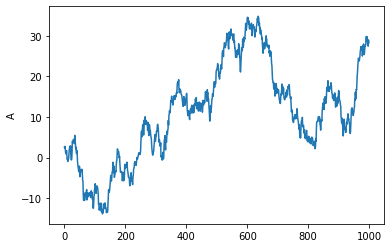

In [ ]:
fig1 = plt.figure()

fig1_a = fig1.add_subplot()
sns.lineplot(data = df1, x = df1.index, y = df1['A'], ax = fig1_a)

# Penguins

In [ ]:
df_pen = sns.load_dataset('penguins')
print(df_pen)
print(df_pen.dtypes)
print(df_pen.columns)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

# 펭귄 종에 따른 부리의 길이와 깊이간의 상관관계
- 색깔 구분: 성별
- 모양 구분: 서식지

Text(0.5, 1.0, 'Gentoo')

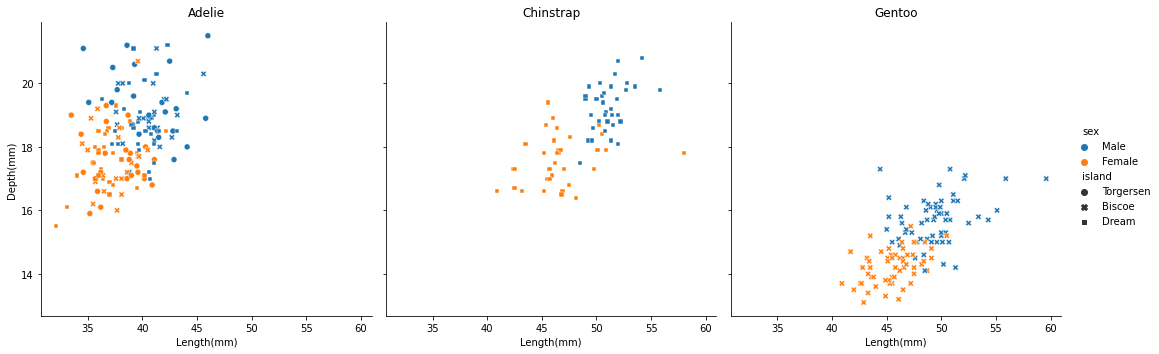

In [ ]:
x = sns.relplot(data = df_pen, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'sex', style = 'island', col = 'species')

# Rename x-label and y-label
x.set_ylabels('Depth(mm)')
x.set_xlabels('Length(mm)')

# Rename title
y = x.axes
y[0, 0].set_title('Adelie')
y[0, 1].set_title('Chinstrap')
y[0, 2].set_title('Gentoo')

# Displot
- Default = histogram

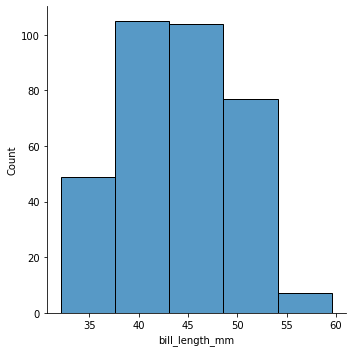

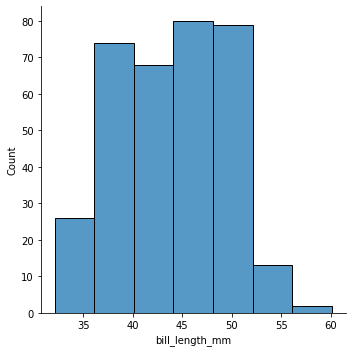

In [ ]:
sns.displot(data = df_pen, x = 'bill_length_mm', bins = 5)
sns.displot(data = df_pen, x = 'bill_length_mm', binwidth = 4)

In [ ]:
df_pen['island_code'] = df_pen['island'].astype('category').cat.codes + 1
df_pen['island_code'] = df_pen['island_code'].astype('category')
print(df_pen)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex island_code  
0         3750.0    Male           3  
1        

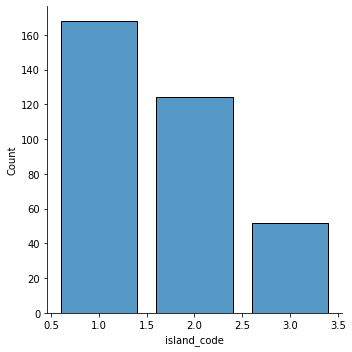

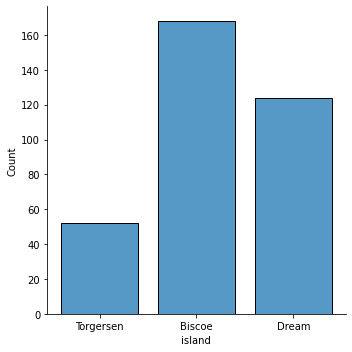

In [ ]:
sns.displot(data = df_pen, x = 'island_code', shrink = 0.8)
sns.displot(data = df_pen, x = 'island', shrink = 0.8)

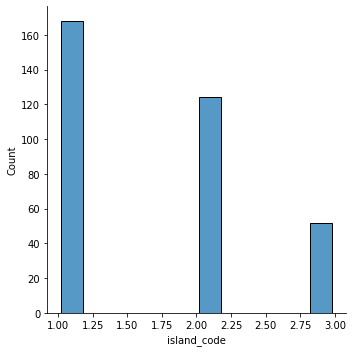

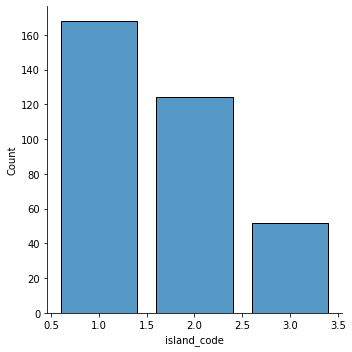

In [ ]:
df_pen['island_code'] = df_pen['island_code'].astype('int64')

 # data type is not category
sns.displot(data = df_pen, x = 'island_code', shrink = 0.8)
sns.displot(data = df_pen, x = 'island_code', shrink = 0.8, bins = [1, 2, 3], discrete = True)

# Kde plot
- Kernel density estimation plot

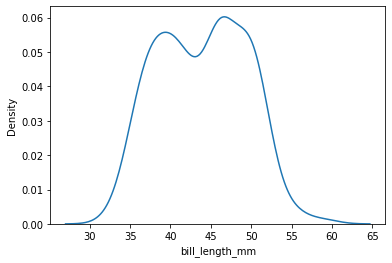

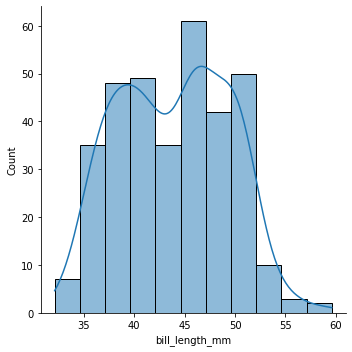

In [ ]:
sns.kdeplot(data = df_pen, x = 'bill_length_mm')
sns.displot(data = df_pen, x = 'bill_length_mm', kde = True) # Merged

# sns.ecdfplot
-  Empirical cumulative distribution plot

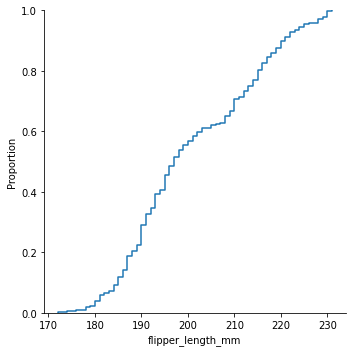

In [ ]:
sns.displot(data = df_pen, x = 'flipper_length_mm', kind = 'ecdf')

# sns.catplot
- Category

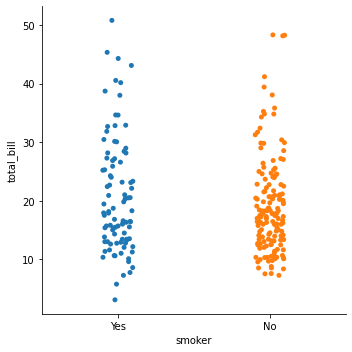

In [ ]:
sns.catplot(data = df_tips, x = 'smoker', y = 'total_bill')

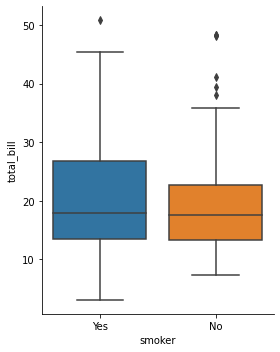

In [ ]:
sns.catplot(data = df_tips, x = 'smoker', y = 'total_bill', kind = 'box', aspect = 0.8)

# Bar plot
- Average
- Std

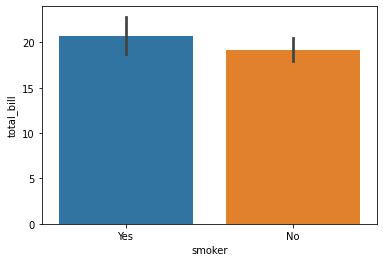

In [ ]:
sns.barplot(data = df_tips, x = 'smoker', y = 'total_bill')

# Line plot
- 95% 유의구간

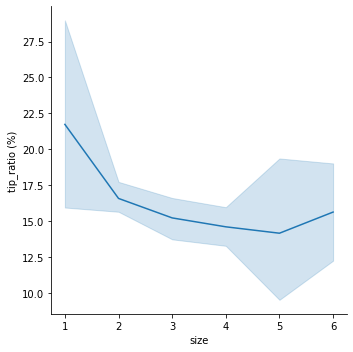

In [ ]:
sns.relplot(data = df_tips, x = 'size', y = 'tip_ratio (%)', kind = 'line')

# sns.lmplot
- Regression Model

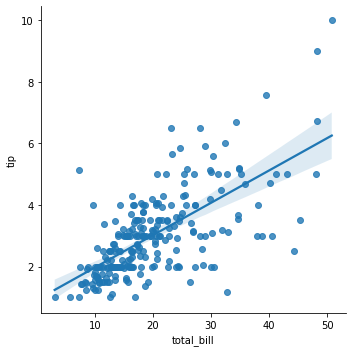

In [ ]:
sns.lmplot(data = df_tips, x = 'total_bill', y = 'tip')

# sns.pairplot
- **Sample collection**
- 상관관계를 찾을때 사용

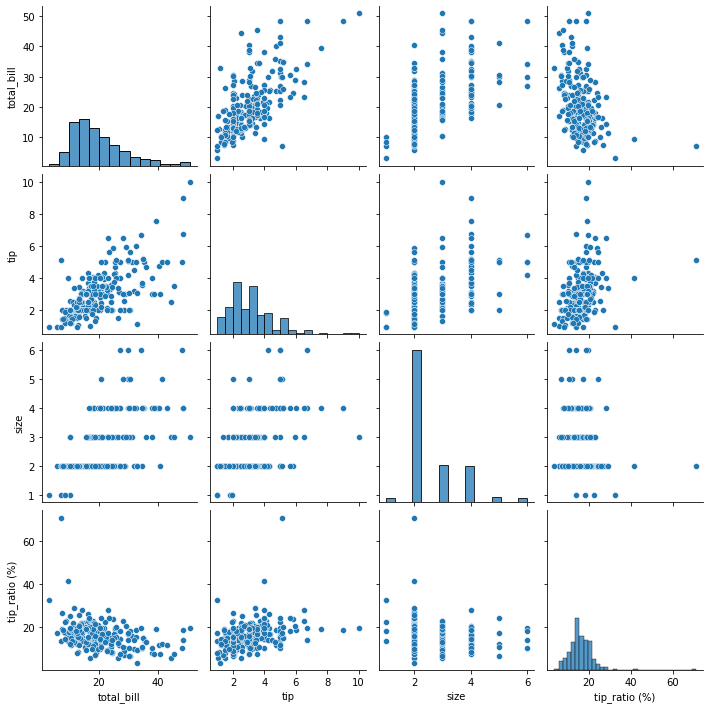

In [ ]:
sns.pairplot(data = df_tips)

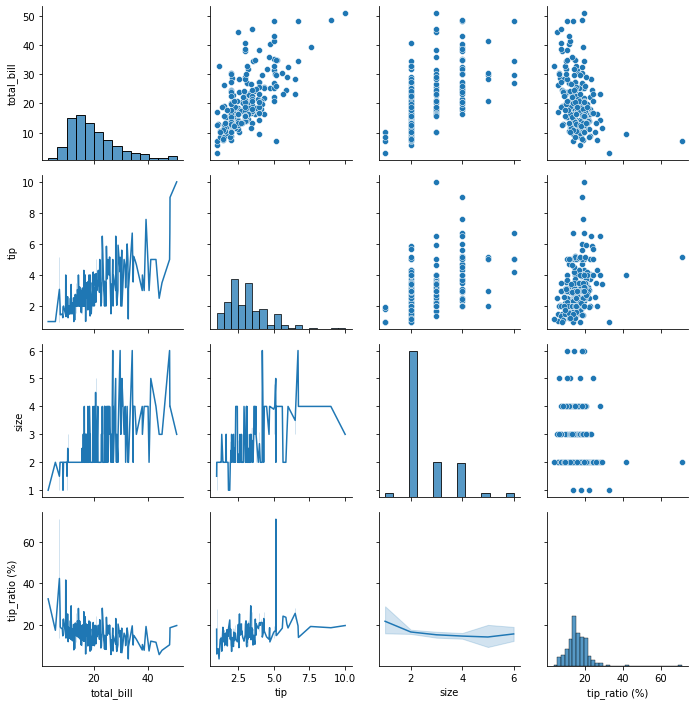

In [ ]:
g1 = sns.PairGrid(df_tips)
g1.map_diag(sns.histplot)
g1.map_upper(sns.scatterplot)
g1.map_lower(sns.lineplot)

# 활용 예제
# 시도별 도서 수

In [4]:
pd_data = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Data/전국도서관표준데이터_utf8.csv', encoding = 'utf8', header = [0])
print(pd_data.head(5))
print(pd_data.columns)

            도서관명    시도명 시군구명  도서관유형          휴관일 평일운영시작시각 평일운영종료시각 토요일운영시작시각  \
0  백운우방까치둥지작은도서관  광주광역시   남구  작은도서관  공휴일, 매주 토요일    13:00    17:00     00:00   
1       베라체작은도서관  광주광역시   남구  작은도서관          공휴일    10:00    18:00     10:00   
2   브라운스톤효천작은도서관  광주광역시   남구  작은도서관           없음    09:00    17:00     09:00   
3      사과나무작은도서관  광주광역시   남구  작은도서관  공휴일, 매주 토요일    10:00    20:00     00:00   
4     사랑의뜰안작은도서관  광주광역시   남구  작은도서관  공휴일, 매주 토요일    14:00    18:00     00:00   

  토요일운영종료시각 공휴일운영시작시각  ...        운영기관명       도서관전화번호  부지면적    건물면적  홈페이지주소  \
0     00:00     00:00  ...  백운우방아이유쉘아파트           NaN   NaN   63.80     NaN   
1     12:00     00:00  ...     한일베라체아파트  062-373-0899   NaN   72.20     NaN   
2     17:00     09:00  ...   브라운스톤효천아파트  062-681-2800   NaN  126.62     NaN   
3     00:00     00:00  ...   사과나무지역아동센터  062-366-6301   NaN   33.00     NaN   
4     00:00     00:00  ...       영원한빛교회  062-654-9101   NaN   36.91     NaN   

          위도          경도     데이터기준일자   제공기관코

Text(0, 0.5, 'Book count')

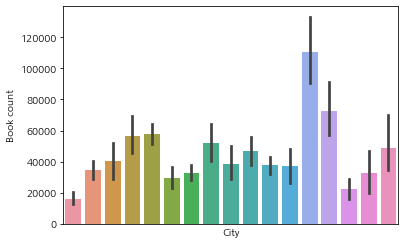

In [5]:
x = sns.barplot(data = pd_data, x = '시도명', y = '자료수(도서)')
x.set_xticks([])
x.set_xlabel('City')
x.set_ylabel('Book count')

In [6]:
pd_data['도서관유형'].value_counts()

작은도서관     2101
공공도서관     1291
어린이도서관      34
학교도서관       26
전문도서관        5
대학도서관        1
Name: 도서관유형, dtype: int64

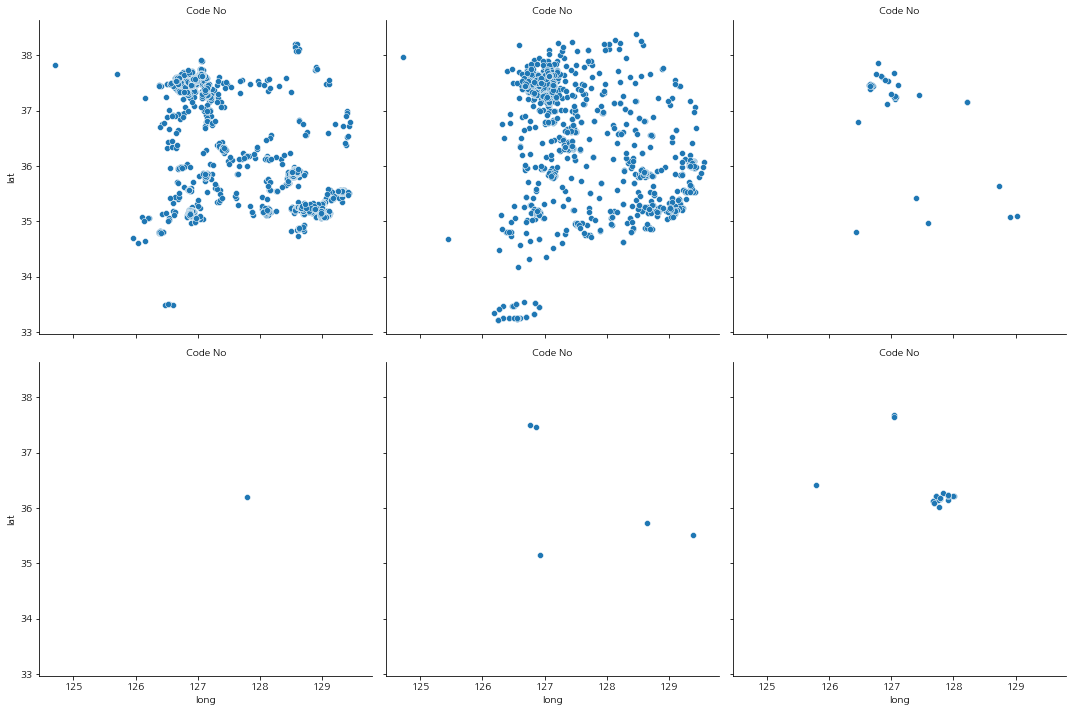

In [7]:
plt.rcParams['font.family'] = 'NanumGothic'

x = sns.relplot(data = pd_data, x = '경도', y = '위도', col = '도서관유형', col_wrap = 3)
x.set_xlabels('long')
x.set_ylabels('lat')
x.set_titles('Code No')

# 지하철 역별 
- hue = 구분 (승하차)
- x = 년월일
- y = 합계


In [11]:
pd_data = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Data/부산교통공사_시간대별 승하차인원_utf8.csv', encoding = 'utf8', header = [0])
print(pd_data.head(5))
print(pd_data.columns)

   역번호       역명         년월일 요일  구분    합계  01시-02시  02시-03시  03시-04시  04시-05시  \
0   95  다대포해수욕장  2022-01-01  토  승차  5142        0        0        0       10   
1   95  다대포해수욕장  2022-01-01  토  하차  4430        0        0        0        1   
2   95  다대포해수욕장  2022-01-02  일  승차  3429        0        0        0        7   
3   95  다대포해수욕장  2022-01-02  일  하차  2992        0        0        0        0   
4   95  다대포해수욕장  2022-01-03  월  승차  4323        0        0        0       19   

   ...  15시-16시  16시-17시  17시-18시  18시-19시  19시-20시  20시-21시  21시-22시  \
0  ...      371      390      449      249      150      108      105   
1  ...      320      329      283      161      124       83      117   
2  ...      412      441      344      182       96      109       66   
3  ...      304      255      191      158      120       76      104   
4  ...      410      335      371      209      110       75       71   

   22시-23시  23시-24시  24시-01시  
0       39       10        3  
1       82       3

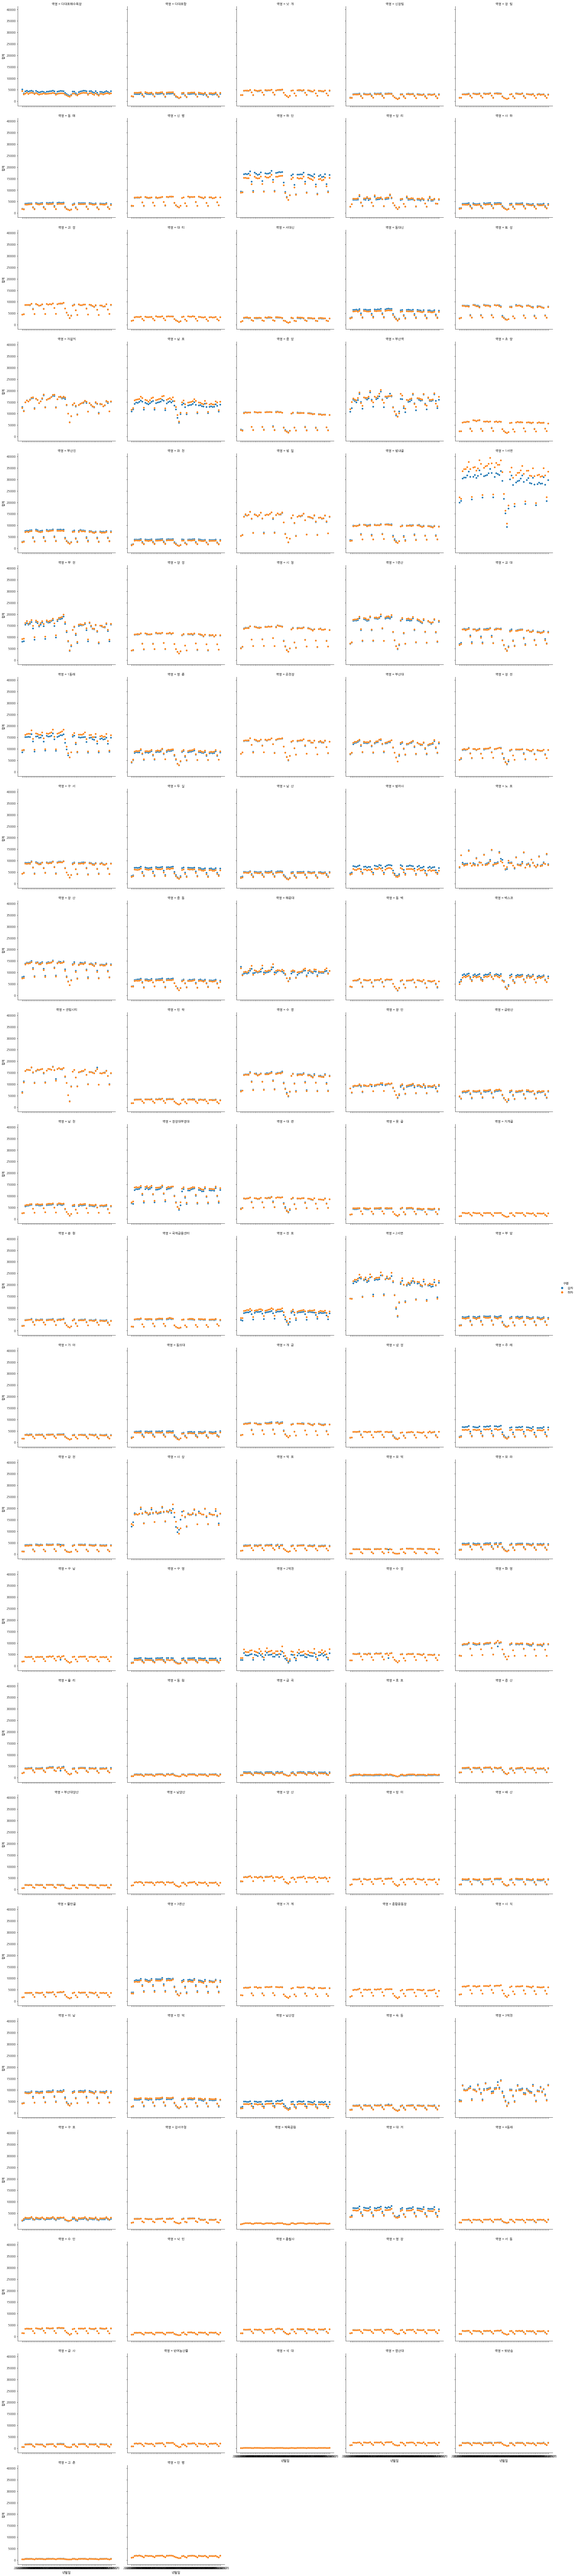

In [12]:
sns.relplot(data = pd_data, x = '년월일', y = '합계', col = '역명', col_wrap = 5, hue = '구분')

In [10]:
sns.pairplot(pd_data)

Output hidden; open in https://colab.research.google.com to view.

# 역별 시간대별 승하차 인원수
- x = 시간대
- y = 승하차 인원
- hue = 구분 (승하차)

- 시간대를 하나의 '시간대' column에 합쳐서 seaborn으로 visualization
- Wide form to long form

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24')]

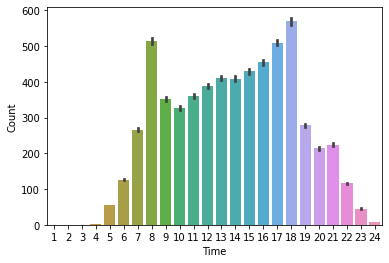

In [ ]:
data = pd_data.set_index(['역명', '년월일', '요일', '구분'])
data = data.stack()
data = data.reset_index()
data.columns = ['역명', '년월일', '요일', '구분', 'Time', 'Count']

x = sns.barplot(data = data, x = 'Time', y = 'Count')
x.set_xticklabels(np.arange(1, 25))